## Follow-up on requests for food aid at 211
Montreal Follow-Up on Requests for Food Aid at 211 is a service of the City of Montreal's to address food insecurity and assist residents in accessing food aid. Managed in collaboration with 211 Greater Montreal, a comprehensive referral service, the program ensures that individuals and families in need can receive timely and appropriate assistance.
The dataset presents all requests (telephone, chat and email) made to 211 Greater Montreal that are related to food in 2021 and 2022 as part of the food insecurity project funded by the City of Montreal 

The data is provided as csv. 

### Steps that are taken
- Load the csv file containing requests data and perform some analysis on the data
- Load the csv file containing follow-up data data and perform some analysis on the data
- Load the csv file containing needs / requirements data data and perform some analysis on the data
- Load the shapefile containing business data and perform some analysis on the data

### Data source
- https://donnees.Montreal.ca/dataset/demandes-aide-alimentaire
- Source: City of Montréal, Open Data Portal Montreal
- Publisher: 211 Greater Montreal
- Accessed: 12.11.2023

The Demandes (Incidents) are grouped by borough and the median of the age is counted for each borough. 
The nonsense counts were deleted.

In [1]:
# Importing required libraries for geospatial analysis, data manipulation, and visualization.
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from openpyxl import Workbook

# Suppress warnings for better readability of the output
import warnings
warnings.filterwarnings('ignore')

In [2]:
print("Current working directory:", os.getcwd())

Current working directory: /home/jovyan/work/Z_FINAL_Food_aid_request


In [3]:
# Ensure the "Figures" directory exists
output_folder = "Figures"
os.makedirs(output_folder, exist_ok=True)

In [4]:
# Define the folder path (you can use an absolute or relative path)
folder_path = "/home/jovyan/work/Data/"

# Set the environment variable, for example 'MY_FOLDER'
os.environ["Data_folder"] = folder_path

# You can verify it's set by printing it
print("Environment variable Data_folder is set to:", os.environ["Data_folder"])

Environment variable Data_folder is set to: /home/jovyan/work/Data/


In [5]:
# Get the folder path from the environment variable
folder_path = os.environ.get("Data_folder")
if not folder_path:
    raise ValueError("The environment variable Data_folder is not set.")

In [6]:
# Load datasets
# Loading CSV and shapefile data for analysis.
file_path = os.path.join(folder_path, "Food_aid_requests/demandes-aide-alimentaire_EN.csv")
requests = gpd.read_file(file_path)
print(requests.shape)
requests.head(5)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


(11106, 10)


,ID_Call,Date,Province,Municipal_district,Region,Age,Gender,Mode_of_communication,Language,geometry
0,82726878,2021-01-02,QC,Le Plateau-Mont-Royal,Montreal,37,Male,Phone calls,French,None
1,82721953,2021-01-02,QC,Villeray-Saint-Michel-Parc-Extension,Montreal,44,Family/Couple/Groups,Chat,French,None
2,82729195,2021-01-02,QC,Lachine,Montréal,36,Female,Clavardage,English,None
3,82749692,2021-01-03,QC,Ahuntsic-Cartierville,Montreal,26,Female,Phone calls,French,None
4,82756689,2021-01-03,QC,Ahuntsic-Cartierville,Montreal,34,Female,Phone calls,French,None


In [7]:
# Load borough boundaries and preview unique names
# original files including information (CODEID, NOM, CODEMAMH, NUM, ABREV, TYPE, COMMENT, DATEMODIF, geometry)
file_path = os.path.join(folder_path, "Administrative_boundaries/limites-administratives-agglomeration.shp")
boroughs = gpd.read_file(file_path)
print(boroughs.shape)
boroughs.head(3)

(34, 9)


,CODEID,NOM,CODEMAMH,NUM,ABREV,TYPE,COMMENT,DATEMODIF,geometry
0,10,LaSalle,REM17,18,LS,Arrondissement,NaN,2023-11-29,"POLYGON ((-73.66610 45.42180, -73.66601 45.428..."
1,3,Dollard-des-Ormeaux,66142,11,DO,Ville liée,NaN,2023-11-29,"POLYGON ((-73.84655 45.46257, -73.84854 45.464..."
2,27,Côte-Saint-Luc,66058,72,CL,Ville liée,NaN,2023-11-29,"MULTIPOLYGON (((-73.68281 45.46318, -73.68162 ..."


In [8]:
# Analyze unique values
# Identifying unique borough names in requests and borough datasets for mapping.
# Unique municipal districts in the requests dataset
unique_values_requests = requests['Municipal_district'].unique()
print(unique_values_requests)

['Le Plateau-Mont-Royal' 'Villeray-Saint-Michel-Parc-Extension' 'Lachine'
 'Ahuntsic-Cartierville' 'Côte-Saint-Luc' 'Le Sud-Ouest'
 'Mercier-Hochelaga-Maisonneuve' 'Saint-Léonard'
 'Côte-des-Neiges-Notre-Dame-de-Grâce' 'Montréal-Nord' 'Pointe-Claire'
 'Rosemont-La Petite-Patrie' 'Dollard-Des Ormeaux' 'Saint-Laurent'
 'Ville-Marie' 'Rivière-des-Prairies-Pointe-aux-Trembles' 'Montréal-Est'
 'Verdun' 'Montreal-North' 'Anjou' 'Mont-Royal' 'Pierrefonds-Roxboro'
 'LaSalle' 'Inconnu-Montréal' 'Sainte-Anne-de-Bellevue' 'Montréal'
 'Outremont' 'Unknown-Montreal' 'Kirkland' 'Dorval' 'Montreal'
 "L'Île-Bizard-Sainte-Geneviève" 'Hampstead' 'Beaconsfield' 'Westmount'
 'Montreal-West' '' "Baie-D'Urfé"
 'Rivière-des-Prairies—Pointe-aux-Trembles'
 'Mercier—Hochelaga-Maisonneuve' 'Rosemont—La Petite-Patrie'
 'Côte-des-Neiges—Notre-Dame-de-Grâce' 'Montréal-Ouest']


In [9]:
# Unique municipal districts in the borough dataset
unique_values_boroughs = boroughs['NOM'].unique()
unique_values_boroughs_sorted = sorted(unique_values_boroughs, key=str.lower)
print(unique_values_boroughs_sorted)

['Ahuntsic-Cartierville', 'Anjou', "Baie-D'Urfé", 'Beaconsfield', 'Côte-des-Neiges-Notre-Dame-de-Grâce', 'Côte-Saint-Luc', 'Dollard-des-Ormeaux', 'Dorval', 'Hampstead', 'Kirkland', "L'Île-Bizard-Sainte-Geneviève", "L'Île-Dorval", 'Lachine', 'LaSalle', 'Le Plateau-Mont-Royal', 'Le Sud-Ouest', 'Mercier-Hochelaga-Maisonneuve', 'Mont-Royal', 'Montréal-Est', 'Montréal-Nord', 'Montréal-Ouest', 'Outremont', 'Pierrefonds-Roxboro', 'Pointe-Claire', 'Rivière-des-Prairies-Pointe-aux-Trembles', 'Rosemont-La Petite-Patrie', 'Saint-Laurent', 'Saint-Léonard', 'Sainte-Anne-de-Bellevue', 'Senneville', 'Verdun', 'Ville-Marie', 'Villeray-Saint-Michel-Parc-Extension', 'Westmount']


In [10]:
# Harmonizing district names
# Correct discrepancies in district names between datasets.

requests['Municipal_district'] = requests['Municipal_district'].replace({
    'Rosemont—La Petite-Patrie': 'Rosemont-La Petite-Patrie',
    'Côte-des-Neiges—Notre-Dame-de-Grâce': 'Côte-des-Neiges-Notre-Dame-de-Grâce',
    'Rivière-des-Prairies—Pointe-aux-Trembles': 'Rivière-des-Prairies-Pointe-aux-Trembles',
    'Montréal-Nord': 'Montreal-North',
    'Montréal-Ouest': 'Montreal-West',
    'Mercier—Hochelaga-Maisonneuve': 'Mercier-Hochelaga-Maisonneuve'
})

unique_values_requests = requests['Municipal_district'].unique()
unique_values_boroughs = boroughs['NOM'].unique()

set_requests = set(unique_values_requests)
set_boroughs = set(unique_values_boroughs)

equal = sorted(set_requests.intersection(set_boroughs))

differences_requests = sorted(set_requests.difference(set_boroughs))
differences_boroughs = sorted(set_boroughs.difference(set_requests))

print("\nCommon Boroughs:", equal)
print("\nDifferences in DataFrame Requests:", differences_requests)
print("\nDifferences in DataFrame Boroughs:", differences_boroughs)


Common Boroughs: ['Ahuntsic-Cartierville', 'Anjou', "Baie-D'Urfé", 'Beaconsfield', 'Côte-Saint-Luc', 'Côte-des-Neiges-Notre-Dame-de-Grâce', 'Dorval', 'Hampstead', 'Kirkland', "L'Île-Bizard-Sainte-Geneviève", 'LaSalle', 'Lachine', 'Le Plateau-Mont-Royal', 'Le Sud-Ouest', 'Mercier-Hochelaga-Maisonneuve', 'Mont-Royal', 'Montréal-Est', 'Outremont', 'Pierrefonds-Roxboro', 'Pointe-Claire', 'Rivière-des-Prairies-Pointe-aux-Trembles', 'Rosemont-La Petite-Patrie', 'Saint-Laurent', 'Saint-Léonard', 'Sainte-Anne-de-Bellevue', 'Verdun', 'Ville-Marie', 'Villeray-Saint-Michel-Parc-Extension', 'Westmount']

Differences in DataFrame Requests: ['', 'Dollard-Des Ormeaux', 'Inconnu-Montréal', 'Montreal', 'Montreal-North', 'Montreal-West', 'Montréal', 'Unknown-Montreal']

Differences in DataFrame Boroughs: ['Dollard-des-Ormeaux', "L'Île-Dorval", 'Montréal-Nord', 'Montréal-Ouest', 'Senneville']


In [11]:
# Compare unique borough names between datasets
unique_values_requests = requests['Municipal_district'].unique()
unique_values_boroughs = boroughs['NOM'].unique()

print("\nNames of boroughs in the dataset requests:\n", unique_values_requests)
print("\nNames of boroughs in the dataset boroughs:\n", unique_values_boroughs)


Names of boroughs in the dataset requests:
 ['Le Plateau-Mont-Royal' 'Villeray-Saint-Michel-Parc-Extension' 'Lachine'
 'Ahuntsic-Cartierville' 'Côte-Saint-Luc' 'Le Sud-Ouest'
 'Mercier-Hochelaga-Maisonneuve' 'Saint-Léonard'
 'Côte-des-Neiges-Notre-Dame-de-Grâce' 'Montreal-North' 'Pointe-Claire'
 'Rosemont-La Petite-Patrie' 'Dollard-Des Ormeaux' 'Saint-Laurent'
 'Ville-Marie' 'Rivière-des-Prairies-Pointe-aux-Trembles' 'Montréal-Est'
 'Verdun' 'Anjou' 'Mont-Royal' 'Pierrefonds-Roxboro' 'LaSalle'
 'Inconnu-Montréal' 'Sainte-Anne-de-Bellevue' 'Montréal' 'Outremont'
 'Unknown-Montreal' 'Kirkland' 'Dorval' 'Montreal'
 "L'Île-Bizard-Sainte-Geneviève" 'Hampstead' 'Beaconsfield' 'Westmount'
 'Montreal-West' '' "Baie-D'Urfé"]

Names of boroughs in the dataset boroughs:
 ['LaSalle' 'Dollard-des-Ormeaux' 'Côte-Saint-Luc'
 'Villeray-Saint-Michel-Parc-Extension' 'Rosemont-La Petite-Patrie'
 'Hampstead' 'Senneville' 'Le Plateau-Mont-Royal'
 'Sainte-Anne-de-Bellevue' 'Montréal-Ouest'
 'Côte-des-Neige

In [12]:
# Print the content of the age
print("\nContent of the ages:\n", requests['Age'].unique())


Content of the ages:
 ['37' '44' '36' '26' '34' '74' '25' '66' '10' '57' '41' '19' '38' '60'
 '61' '43' '62' '55' '13' '33' '39' '52' 'Man' '64' '27' '67' '' '49' '24'
 '30' '68' '69' '46' '51' '35' '40' '75' '59' '14' '50' '32' '70' 'Other'
 '45' 'Female' '53' '48' '85' '56' '83' '73' '63' '58' '42' '76' '28' '71'
 '31' '80' '18' '89' '77' '79' '54' '72' '29' '84' '20'
 'Family/Couple/Groups' '87' '78' '47' '21' '65' '23' '22' '99' '94' '17'
 '82' '91' '86' '90' '81' '1' '88' '15' 'Male' '97' '2' '8' '11' '93' '9'
 '3' '5' '98' '32-6' '5310' '39 1034' '92' '2829' '46-53' '55 70' '16'
 '12' '16 - 50' '46-17' 'I forgot to ask/Not available' '41-39' '95'
 '96-69' '25-8-5' '28-4-8' '28-27-3' '3-4-30' '4' '30-35' '45-22' '70-72'
 '36-7' '48-18' '22-25' '4-6' '64-68' '7' '6' '40-3-4' '96' '101'
 '40-12-13' '88-89']


In [13]:
# Make a copy of the ages data and show wht type is it
requests_copy = requests.copy()
print(requests_copy['Age'].dtype)

object


In [14]:
# Clean `Age` column in `requests`
# - Replace invalid age values with NaN.
# - Convert valid numeric ages to integers.
# - Remove outliers (e.g., ages outside the range 0-120).

# Replace invalid values with NaN
requests_copy['Age'] = requests_copy['Age'].replace(['Man', 'Female', 'Other', '', 'I forgot to ask/Not available'], pd.NA)

# Drop rows with NaN values in `Age`
requests_copy = requests_copy.dropna(subset=['Age'])

requests_copy['Age'] = requests_copy['Age'].astype(str)

# Filter only numeric values and perform conversion to numbers
valid_age_values = requests_copy['Age'].str.extract(r'(\d+)', expand=False)
requests_copy['Age'] = pd.to_numeric(valid_age_values, errors='coerce')

# Remove age values that are not in the range 0 to 120 years
requests_copy = requests_copy[(requests_copy['Age'] >= 0) & (requests_copy['Age'] <= 120)]

print(requests_copy['Age'].unique())

[ 37.  44.  36.  26.  34.  74.  25.  66.  10.  57.  41.  19.  38.  60.
  61.  43.  62.  55.  13.  33.  39.  52.  64.  27.  67.  49.  24.  30.
  68.  69.  46.  51.  35.  40.  75.  59.  14.  50.  32.  70.  45.  53.
  48.  85.  56.  83.  73.  63.  58.  42.  76.  28.  71.  31.  80.  18.
  89.  77.  79.  54.  72.  29.  84.  20.  87.  78.  47.  21.  65.  23.
  22.  99.  94.  17.  82.  91.  86.  90.  81.   1.  88.  15.  97.   2.
   8.  11.  93.   9.   3.   5.  98.  92.  16.  12.  95.  96.   4.   7.
   6. 101.]


In [15]:
# Calculate borough-wise statistics
# - Median age and count of valid records are calculated for each borough.

# Create a new dataset with median age and number of records for each area
borough_age_stats = requests_copy.groupby('Municipal_district')['Age'].agg(['median', 'count']).reset_index()

# Rename column 'median' to 'Median_Age' for clearer description
borough_age_stats.rename(columns={'median': 'Median_Age'}, inplace=True)
print(borough_age_stats)

                          Municipal_district  Median_Age  count
0                                                   54.0      5
1                      Ahuntsic-Cartierville        43.0    721
2                                      Anjou        50.5    188
3                                Baie-D'Urfé        85.0      2
4                               Beaconsfield        36.0      3
5                             Côte-Saint-Luc        38.5     64
6        Côte-des-Neiges-Notre-Dame-de-Grâce        40.0    579
7                        Dollard-Des Ormeaux        44.0     27
8                                     Dorval        45.0     26
9                                  Hampstead        63.0      4
10                          Inconnu-Montréal        52.0     18
11                                  Kirkland        41.0      5
12             L'Île-Bizard-Sainte-Geneviève        67.0     18
13                                   LaSalle        45.0    376
14                                   Lac

In [16]:
# Filter out boroughs with fewer than 15 records
borough_age_stats_filtered = borough_age_stats[borough_age_stats['count'] > 15]
print(borough_age_stats_filtered)

                          Municipal_district  Median_Age  count
1                      Ahuntsic-Cartierville        43.0    721
2                                      Anjou        50.5    188
5                             Côte-Saint-Luc        38.5     64
6        Côte-des-Neiges-Notre-Dame-de-Grâce        40.0    579
7                        Dollard-Des Ormeaux        44.0     27
8                                     Dorval        45.0     26
10                          Inconnu-Montréal        52.0     18
12             L'Île-Bizard-Sainte-Geneviève        67.0     18
13                                   LaSalle        45.0    376
14                                   Lachine        42.5    200
15                     Le Plateau-Mont-Royal        44.0    477
16                              Le Sud-Ouest        48.0    452
17             Mercier-Hochelaga-Maisonneuve        46.0   1080
18                                Mont-Royal        42.5     26
20                            Montreal-N

In [17]:
# Rename column 'Municipalite-arrondisseMalet' to 'NOM'
borough_age_stats_filtered.rename(columns={'Municipal_district': 'NOM'}, inplace=True)
borough_age_stats_filtered.rename(columns={'count': 'age_count'}, inplace=True)
print(borough_age_stats_filtered)

                                         NOM  Median_Age  age_count
1                      Ahuntsic-Cartierville        43.0        721
2                                      Anjou        50.5        188
5                             Côte-Saint-Luc        38.5         64
6        Côte-des-Neiges-Notre-Dame-de-Grâce        40.0        579
7                        Dollard-Des Ormeaux        44.0         27
8                                     Dorval        45.0         26
10                          Inconnu-Montréal        52.0         18
12             L'Île-Bizard-Sainte-Geneviève        67.0         18
13                                   LaSalle        45.0        376
14                                   Lachine        42.5        200
15                     Le Plateau-Mont-Royal        44.0        477
16                              Le Sud-Ouest        48.0        452
17             Mercier-Hochelaga-Maisonneuve        46.0       1080
18                                Mont-Royal    

In [18]:
# Merge statistics with borough boundaries
# - Adds `Median_Age` and `age_count` to geospatial borough data.
merged_data = boroughs.merge(borough_age_stats_filtered, on='NOM', how='left')

# Replace missing values in the 'Median_Age' and 'age_count' columns with 0
merged_data['Median_Age'].fillna(0, inplace=True)
merged_data['age_count'].fillna(0, inplace=True)

merged_data.head(5)
#print(merged_data)

,CODEID,NOM,CODEMAMH,NUM,ABREV,TYPE,COMMENT,DATEMODIF,geometry,Median_Age,age_count
0,10,LaSalle,REM17,18,LS,Arrondissement,NaN,2023-11-29,"POLYGON ((-73.66610 45.42180, -73.66601 45.428...",45.0,376.0
1,3,Dollard-des-Ormeaux,66142,11,DO,Ville liée,NaN,2023-11-29,"POLYGON ((-73.84655 45.46257, -73.84854 45.464...",0.0,0.0
2,27,Côte-Saint-Luc,66058,72,CL,Ville liée,NaN,2023-11-29,"MULTIPOLYGON (((-73.68281 45.46318, -73.68162 ...",38.5,64.0
3,19,Villeray-Saint-Michel-Parc-Extension,REM25,26,VS,Arrondissement,NaN,2023-11-29,"POLYGON ((-73.62078 45.52365, -73.62167 45.523...",44.0,850.0
4,18,Rosemont-La Petite-Patrie,REM24,25,RO,Arrondissement,NaN,2023-11-29,"POLYGON ((-73.56850 45.58144, -73.56537 45.580...",50.0,955.0


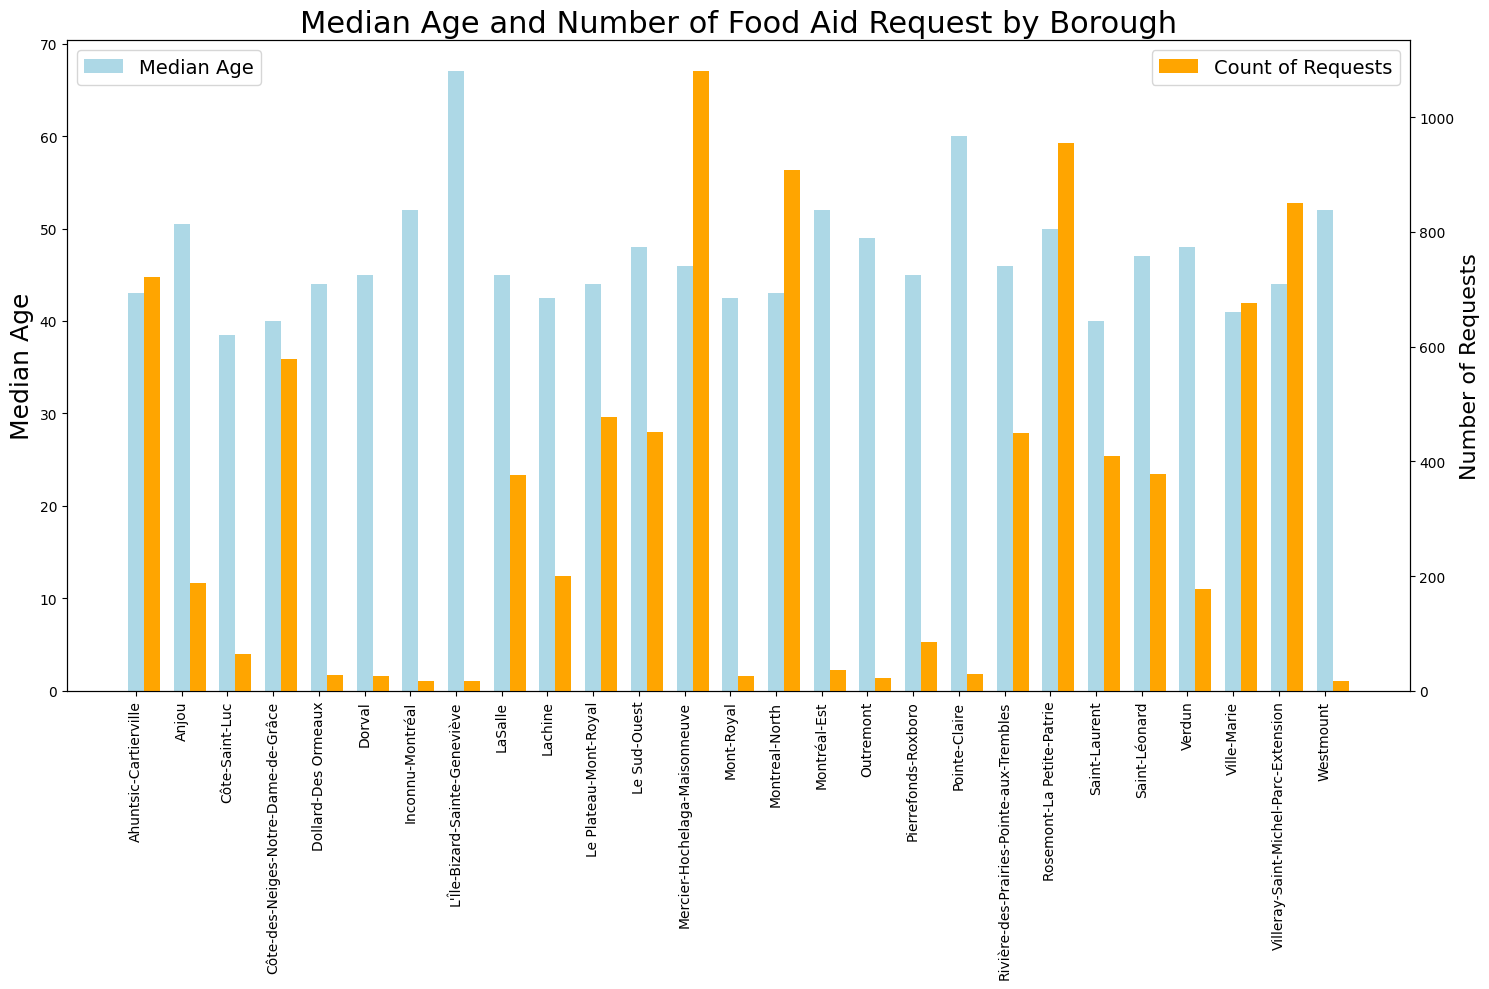

In [19]:
# Bar plot for Median Age and Record Count (dual-axis)
fig, ax1 = plt.subplots(figsize=(15, 10))
bar_width = 0.35
index = np.arange(len(borough_age_stats_filtered))

# Median Age on the primary axis
ax1.bar(index, borough_age_stats_filtered['Median_Age'], bar_width, label='Median Age', color='lightblue')
# ax1.set_xlabel('Borough')
ax1.set_ylabel('Median Age', size=18)
# , color='lightblue')
ax1.set_title('Median Age and Number of Food Aid Request by Borough', size=22)
ax1.set_xticks(index)
ax1.set_xticklabels(borough_age_stats_filtered['NOM'], rotation=90)

# Record count on the secondary axis
ax2 = ax1.twinx()
ax2.bar(index + bar_width, borough_age_stats_filtered['age_count'], bar_width, label='Count of Requests', color='orange')
ax2.set_ylabel('Number of Requests', size=16)
#, color='orange')

# Add legends
ax1.legend(loc='upper left', fontsize=14)
ax2.legend(loc='upper right', fontsize=14)

# Save and show the plot
plt.tight_layout()
# Save the figure in the "Figures" folder
output_path = os.path.join(output_folder, 'Median_age_and_number_food_aid_requests_per_borough.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()

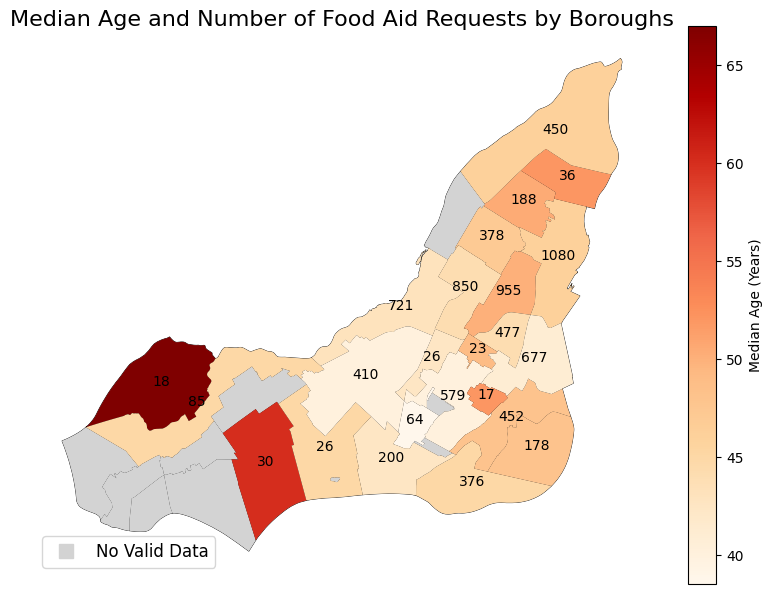

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot borough boundaries
boroughs.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)

# Highlight boroughs with no data in light grey
no_data_plot = merged_data[merged_data['Median_Age'] == 0].plot(
    ax=ax, color='lightgrey', label='No Data'
)

# Plot boroughs with valid data using a color scale and include legend_kwds
merged_data[merged_data['Median_Age'] != 0].plot(
    column='Median_Age',
    ax=ax,
    legend=True,
    cmap='OrRd',
    legend_kwds={
        'label': 'Median Age (Years)'        # Label for the legend
    }
)

# Add numbers (age_count) to each polygon
for idx, row in merged_data.iterrows():
    if row['Median_Age'] != 0:  # Skip boroughs with no data
        centroid = row['geometry'].centroid  # Calculate the centroid of the polygon
        ax.text(
            centroid.x, 
            centroid.y, 
            f"{int(row['age_count'])}",  # Format as a whole number
            # f"{row['age_count']:.1f}",  # Format to 1 decimal place
            horizontalalignment='center', 
            fontsize=10, 
            color='black'
        )

# Add a title to the map
ax.set_title('Median Age and Number of Food Aid Requests by Boroughs', size=16)

# Hide axes for cleaner visuals
ax.set_axis_off()

# Add custom legend entries for boroughs with and without data
from matplotlib.lines import Line2D
custom_legend = [
    Line2D([0], [0], color='lightgrey', marker='s', linestyle='None', markersize=10, label='No Valid Data')
]
ax.legend(handles=custom_legend, loc='lower left', fontsize=12)


# After the plot call, the colorbar is typically the last axis in the figure
cbar_ax = fig.axes[-1]
# Set the colorbar title with the desired font size
# cbar_ax.set_title('Median Age (Years)', fontsize=14)
# Optionally, adjust the tick label size on the colorbar
cbar_ax.tick_params(labelsize=10)

# Save and show the plot
plt.tight_layout()
# Save the figure in the "Figures" folder
output_path = os.path.join(output_folder, 'Map_food_aid_requests_median_age_and_number.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()

In [21]:
# Load an Excel sheet into a pandas DataFrame
excel_file_path = os.path.join(folder_path, "Administrative_boundaries/boroughs.xlsx")
sheet_name = 'Sheet1'  # Update with the sheet name you want to load
df = pd.read_excel(excel_file_path, sheet_name=sheet_name)
print(f"Excel sheet '{sheet_name}' loaded successfully.")
df.head(3)

Excel sheet 'Sheet1' loaded successfully.


,CODEID,NOM,NOM_OFFICI,CODEMAMH,CODE_3C,NUM,ABREV,TYPE,DATEMODIF,population2021,residential_area
0,0,Montreal island,Montreal island,MIS,MIS,0,MI,City,2025-03-27,2011366,223.240487
1,34,Anjou,Anjou,REM09,ANJ,9,AJ,Arrondissement,2022-08-24,43332,4.315678
2,33,Pointe-Claire,Pointe-Claire,66097,PCL,8,PC,Ville liée,2022-08-24,33551,9.012024


In [22]:
# Drop the 'geometry' and 'COMMENT' columns in place
df.drop(columns=['CODEID', 'NOM', 'NOM_OFFICI', 'CODEMAMH', 'CODE_3C', 'ABREV', 'TYPE', 'DATEMODIF'], inplace=True)
df.head(3)

,NUM,population2021,residential_area
0,0,2011366,223.240487
1,9,43332,4.315678
2,8,33551,9.012024


In [23]:
# Suppose df1 and df2 are your two DataFrames, and both have a 'NUM' column.
merged_data = pd.merge(merged_data, df, on='NUM', how='inner')  # 'inner' join keeps only rows with matching NUM in both
merged_data.head(3)

,CODEID,NOM,CODEMAMH,NUM,ABREV,TYPE,COMMENT,DATEMODIF,geometry,Median_Age,age_count,population2021,residential_area
0,10,LaSalle,REM17,18,LS,Arrondissement,NaN,2023-11-29,"POLYGON ((-73.66610 45.42180, -73.66601 45.428...",45.0,376.0,82238,7.640207
1,3,Dollard-des-Ormeaux,66142,11,DO,Ville liée,NaN,2023-11-29,"POLYGON ((-73.84655 45.46257, -73.84854 45.464...",0.0,0.0,48306,11.090901
2,27,Côte-Saint-Luc,66058,72,CL,Ville liée,NaN,2023-11-29,"MULTIPOLYGON (((-73.68281 45.46318, -73.68162 ...",38.5,64.0,33508,3.984467


In [24]:
merged_data['density'] = merged_data['age_count']/(merged_data['residential_area'] * merged_data['population2021']) 
merged_data.head(3)

,CODEID,NOM,CODEMAMH,NUM,ABREV,TYPE,COMMENT,DATEMODIF,geometry,Median_Age,age_count,population2021,residential_area,density
0,10,LaSalle,REM17,18,LS,Arrondissement,NaN,2023-11-29,"POLYGON ((-73.66610 45.42180, -73.66601 45.428...",45.0,376.0,82238,7.640207,0.000598
1,3,Dollard-des-Ormeaux,66142,11,DO,Ville liée,NaN,2023-11-29,"POLYGON ((-73.84655 45.46257, -73.84854 45.464...",0.0,0.0,48306,11.090901,0.000000
2,27,Côte-Saint-Luc,66058,72,CL,Ville liée,NaN,2023-11-29,"MULTIPOLYGON (((-73.68281 45.46318, -73.68162 ...",38.5,64.0,33508,3.984467,0.000479


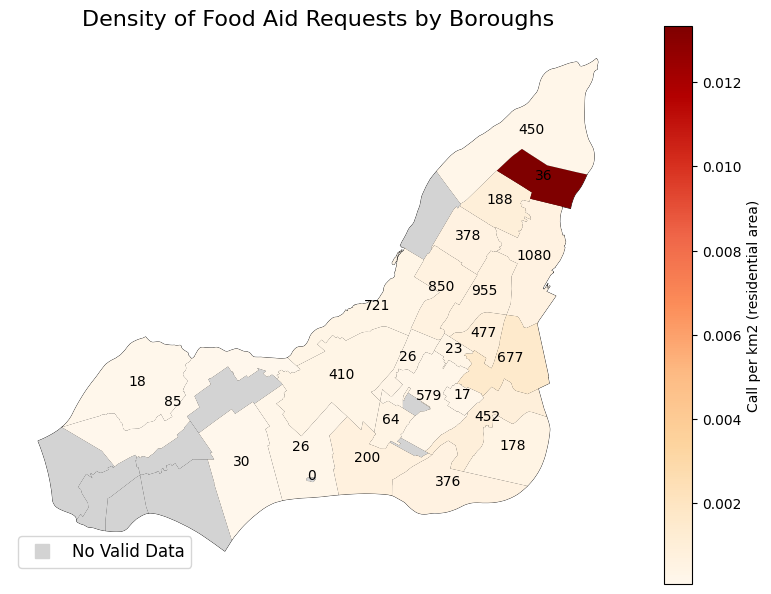

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot borough boundaries
boroughs.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)

# Highlight boroughs with no data in light grey
no_data_plot = merged_data[merged_data['Median_Age'] == 0].plot(
    ax=ax, color='lightgrey', label='No Data'
)

# Plot boroughs with valid data using a color scale and include legend_kwds
merged_data[merged_data['density'] != 0].plot(
    column='density',
    ax=ax,
    legend=True,
    cmap='OrRd',
    legend_kwds={
        'label': 'Call per km2 (residential area)'        # Label for the legend
    }
)

# Add numbers (age_count) to each polygon
for idx, row in merged_data.iterrows():
    if row['density'] != 0:  # Skip boroughs with no data
        centroid = row['geometry'].centroid  # Calculate the centroid of the polygon
        ax.text(
            centroid.x, 
            centroid.y, 
            f"{int(row['age_count'])}",  # Format as a whole number
            # f"{row['age_count']:.1f}",  # Format to 1 decimal place
            horizontalalignment='center', 
            fontsize=10, 
            color='black'
        )

# Add a title to the map
ax.set_title('Density of Food Aid Requests by Boroughs', size=16)

# Hide axes for cleaner visuals
ax.set_axis_off()

# Add custom legend entries for boroughs with and without data
from matplotlib.lines import Line2D
custom_legend = [
    Line2D([0], [0], color='lightgrey', marker='s', linestyle='None', markersize=10, label='No Valid Data')
]
ax.legend(handles=custom_legend, loc='lower left', fontsize=12)


# After the plot call, the colorbar is typically the last axis in the figure
cbar_ax = fig.axes[-1]
# Set the colorbar title with the desired font size
# cbar_ax.set_title('Median Age (Years)', fontsize=14)
# Optionally, adjust the tick label size on the colorbar
cbar_ax.tick_params(labelsize=10)

# Save and show the plot
plt.tight_layout()
# Save the figure in the "Figures" folder
output_path = os.path.join(output_folder, 'Map_food_aid_requests_density.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()

In [26]:
merged_data.loc[merged_data['NUM'] == 74, 'Median_Age'] = 0
merged_data.loc[merged_data['NUM'] == 74, 'age_count'] = 0
merged_data.loc[merged_data['NUM'] == 74, 'density'] = 0
merged_data.head(35)

,CODEID,NOM,CODEMAMH,NUM,ABREV,TYPE,COMMENT,DATEMODIF,geometry,Median_Age,age_count,population2021,residential_area,density
0,10,LaSalle,REM17,18,LS,Arrondissement,NaN,2023-11-29,"POLYGON ((-73.66610 45.42180, -73.66601 45.428...",45.0,376.0,82238,7.640207,0.000598
1,3,Dollard-des-Ormeaux,66142,11,DO,Ville liée,NaN,2023-11-29,"POLYGON ((-73.84655 45.46257, -73.84854 45.464...",0.0,0.0,48306,11.090901,0.000000
2,27,Côte-Saint-Luc,66058,72,CL,Ville liée,NaN,2023-11-29,"MULTIPOLYGON (((-73.68281 45.46318, -73.68162 ...",38.5,64.0,33508,3.984467,0.000479
3,19,Villeray-Saint-Michel-Parc-Extension,REM25,26,VS,Arrondissement,NaN,2023-11-29,"POLYGON ((-73.62078 45.52365, -73.62167 45.523...",44.0,850.0,144328,8.611489,0.000684
4,18,Rosemont-La Petite-Patrie,REM24,25,RO,Arrondissement,NaN,2023-11-29,"POLYGON ((-73.56850 45.58144, -73.56537 45.580...",50.0,955.0,141465,10.155417,0.000665
5,2,Hampstead,66062,10,HS,Ville liée,NaN,2023-11-29,"POLYGON ((-73.64446 45.47397, -73.64490 45.474...",0.0,0.0,6955,1.758258,0.000000
6,32,Senneville,66127,77,SV,Ville liée,NaN,2023-11-29,"POLYGON ((-73.92490 45.44060, -73.92627 45.440...",0.0,0.0,941,0.687047,0.000000
7,15,Le Plateau-Mont-Royal,REM21,22,PM,Arrondissement,NaN,2023-11-29,"POLYGON ((-73.59027 45.51578, -73.59048 45.515...",44.0,477.0,106177,5.048611,0.000890
8,31,Sainte-Anne-de-Bellevue,66117,76,BV,Ville liée,NaN,2023-11-29,"POLYGON ((-73.93359 45.39878, -73.93478 45.398...",0.0,0.0,5027,1.070499,0.000000
9,30,Montréal-Ouest,66047,75,MO,Ville liée,NaN,2023-11-29,"POLYGON ((-73.65796 45.45953, -73.65785 45.459...",0.0,0.0,5274,0.991242,0.000000


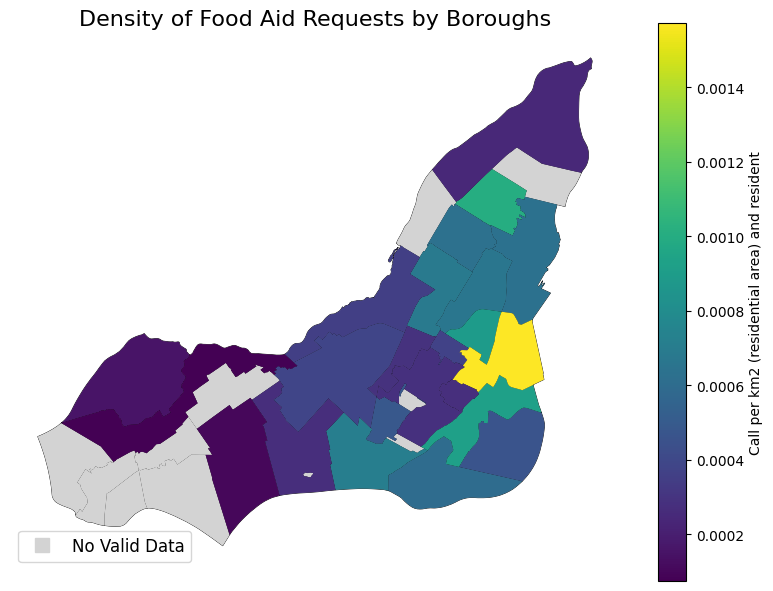

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot borough boundaries
boroughs.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)

# Highlight boroughs with no data in light grey
no_data_plot = merged_data[merged_data['Median_Age'] == 0].plot(
    ax=ax, color='lightgrey', label='No Data'
)

# Plot boroughs with valid data using a color scale and include legend_kwds
merged_data[merged_data['density'] != 0].plot(
    column='density',
    ax=ax,
    legend=True,
    cmap='viridis',
    legend_kwds={
        'label': 'Call per km2 (residential area) and resident'        # Label for the legend
    }
)

# Add a title to the map
ax.set_title('Density of Food Aid Requests by Boroughs', size=16)

# Hide axes for cleaner visuals
ax.set_axis_off()

# Add custom legend entries for boroughs with and without data
from matplotlib.lines import Line2D
custom_legend = [
    Line2D([0], [0], color='lightgrey', marker='s', linestyle='None', markersize=10, label='No Valid Data')
]
ax.legend(handles=custom_legend, loc='lower left', fontsize=12)


# After the plot call, the colorbar is typically the last axis in the figure
cbar_ax = fig.axes[-1]
# Set the colorbar title with the desired font size
# cbar_ax.set_title('Median Age (Years)', fontsize=14)
# Optionally, adjust the tick label size on the colorbar
cbar_ax.tick_params(labelsize=10)

# Save and show the plot
plt.tight_layout()
# Save the figure in the "Figures" folder
output_path = os.path.join(output_folder, 'Map_food_aid_requests_density.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()

In [28]:
# Save the DataFrame to an Excel file
merged_data.to_excel('merged_data.xlsx', index=False)